In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
cricket_data = pd.read_csv("Cricket-all-teams-all-matches.csv")
cricket_data.head()

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard,Format
0,India,Pakistan,drawn,NaN,Bengaluru,"Dec 8-12, 2007",Test # 1852,Test
1,India,Pakistan,drawn,NaN,Eden Gardens,"Nov 30-Dec 4, 2007",Test # 1850,Test
2,India,Pakistan,India,6 wickets,Delhi,"Nov 22-26, 2007",Test # 1849,Test
3,Pakistan,India,Pakistan,341 runs,Karachi,"Jan 29-Feb 1, 2006",Test # 1783,Test
4,Pakistan,India,drawn,NaN,Faisalabad,"Jan 21-25, 2006",Test # 1782,Test


In [3]:
# Filter for Test matches only (as the dataset covers other formats too)
test_data = cricket_data.loc[cricket_data['Format'] == 'Test ', :]


test_data

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard,Format
0,India,Pakistan,drawn,NaN,Bengaluru,"Dec 8-12, 2007",Test # 1852,Test
1,India,Pakistan,drawn,NaN,Eden Gardens,"Nov 30-Dec 4, 2007",Test # 1850,Test
2,India,Pakistan,India,6 wickets,Delhi,"Nov 22-26, 2007",Test # 1849,Test
3,Pakistan,India,Pakistan,341 runs,Karachi,"Jan 29-Feb 1, 2006",Test # 1783,Test
4,Pakistan,India,drawn,NaN,Faisalabad,"Jan 21-25, 2006",Test # 1782,Test
...,...,...,...,...,...,...,...,...
7731,Zimbabwe,West Indies,drawn,NaN,Harare,"Jul 27-31, 2001",Test # 1553,Test
7732,Zimbabwe,West Indies,West Indies,inns & 176 runs,Bulawayo,"Jul 19-22, 2001",Test # 1551,Test
7733,West Indies,Zimbabwe,West Indies,10 wickets,Kingston,"Mar 24-28, 2000",Test # 1492,Test
7734,West Indies,Zimbabwe,West Indies,35 runs,Port of Spain,"Mar 16-20, 2000",Test # 1490,Test


In [4]:
test_data.shape

(2581, 8)

In [5]:
#Removing Missing / Drawn Values
test_data = test_data.dropna()
test_data.shape

(1787, 8)

In [6]:
#Add Year Column
test_data['Year'] = test_data['Match Date'].str[-4:]
test_data.head()

C:\Users\krish\AppData\Local\Temp\ipykernel_20820\3813927358.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Year'] = test_data['Match Date'].str[-4:]


,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard,Format,Year
2,India,Pakistan,India,6 wickets,Delhi,"Nov 22-26, 2007",Test # 1849,Test,2007
3,Pakistan,India,Pakistan,341 runs,Karachi,"Jan 29-Feb 1, 2006",Test # 1783,Test,2006
6,India,Pakistan,Pakistan,168 runs,Bengaluru,"Mar 24-28, 2005",Test # 1743,Test,2005
7,India,Pakistan,India,195 runs,Eden Gardens,"Mar 16-20, 2005",Test # 1741,Test,2005
9,Pakistan,India,India,inns & 131 runs,Rawalpindi,"Apr 13-16, 2004",Test # 1697,Test,2004


In [7]:
#Re-formatting Scorecard to show just the number (we can sort it by date that way)
test_data['Scorecard'] = test_data['Scorecard'].apply(lambda x: int(x.replace('Test #', '')))
#Sorting by date (order of scorecard variable)
test_data = test_data.sort_values('Scorecard', ascending=True)
test_data.head(10)

C:\Users\krish\AppData\Local\Temp\ipykernel_20820\858455996.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Scorecard'] = test_data['Scorecard'].apply(lambda x: int(x.replace('Test #', '')))


,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard,Format,Year
3945,Australia,England,Australia,45 runs,Melbourne,"Mar 15-19, 1877",1,Test,1877
3944,Australia,England,England,4 wickets,Melbourne,"Mar 31-Apr 4, 1877",2,Test,1877
3943,Australia,England,Australia,10 wickets,Melbourne,"Jan 2-4, 1879",3,Test,1879
3942,England,Australia,England,5 wickets,The Oval,"Sep 6-8, 1880",4,Test,1880
3940,Australia,England,Australia,5 wickets,Sydney,"Feb 17-21, 1882",6,Test,1882
3939,Australia,England,Australia,6 wickets,Sydney,"Mar 3-7, 1882",7,Test,1882
3937,England,Australia,Australia,7 runs,The Oval,"Aug 28-29, 1882",9,Test,1882
3936,Australia,England,Australia,9 wickets,Melbourne,"Dec 30, 1882 - Jan 2, 1883",10,Test,1883
3935,Australia,England,England,inns & 27 runs,Melbourne,"Jan 19-22, 1883",11,Test,1883
3934,Australia,England,England,69 runs,Sydney,"Jan 26-30, 1883",12,Test,1883


In [8]:
#Filter Dataframe to just matches from 2000
test_data['Year'] = test_data['Year'].astype(int)
test_data = test_data[(test_data['Year'] >= 2000)]
test_data.head()

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard,Format,Year
1739,Australia,India,Australia,inns & 141 runs,Sydney,"Jan 2-4, 2000",1481,Test,2000
5898,South Africa,England,South Africa,inns & 37 runs,Cape Town,"Jan 2-5, 2000",1482,Test,2000
5897,South Africa,England,England,2 wickets,Centurion,"Jan 14-18, 2000",1483,Test,2000
2583,India,South Africa,South Africa,4 wickets,Wankhede,"Feb 24-26, 2000",1484,Test,2000
1149,Pakistan,Sri Lanka,Sri Lanka,2 wickets,Rawalpindi,"Feb 26-Mar 1, 2000",1485,Test,2000


In [9]:
#Re-formatting the Scorecard to start from 1
i = 1
for index, row in test_data.iterrows():
    test_data.loc[index, 'Scorecard'] = i
    i = i + 1
#Renaming Scorecard to Match ID for clarity
test_data = test_data.rename(columns={'Scorecard': 'Match ID', 'Team 1': 'HomeTeam', 'Team 2': 'AwayTeam'})
test_data.head()

,HomeTeam,AwayTeam,Winner,Margin,Ground,Match Date,Match ID,Format,Year
1739,Australia,India,Australia,inns & 141 runs,Sydney,"Jan 2-4, 2000",1,Test,2000
5898,South Africa,England,South Africa,inns & 37 runs,Cape Town,"Jan 2-5, 2000",2,Test,2000
5897,South Africa,England,England,2 wickets,Centurion,"Jan 14-18, 2000",3,Test,2000
2583,India,South Africa,South Africa,4 wickets,Wankhede,"Feb 24-26, 2000",4,Test,2000
1149,Pakistan,Sri Lanka,Sri Lanka,2 wickets,Rawalpindi,"Feb 26-Mar 1, 2000",5,Test,2000


In [10]:
# Create a DataFrame to store individual team results for easier rolling calculations
team_results_list = []
for index, row in test_data.iterrows():
    # Home Team's perspective
    team_results_list.append({
        'Year': row["Year"],
        'Match ID': row['Match ID'],
        'Team': row['HomeTeam'],
        'IsHome': 1,
        'Result': 1 if row['Winner'] == row['HomeTeam'] else 0 # 1 for win, 0 for loss
    })
    # Away Team's perspective
    team_results_list.append({
        'Year': row["Year"],
        'Match ID': row['Match ID'],
        'Team': row['AwayTeam'],
        'IsHome': 0,
        'Result': 1 if row['Winner'] == row['AwayTeam'] else 0 # 1 for win, 0 for loss
    })

team_results = pd.DataFrame(team_results_list)
team_results = team_results.sort_values(by=['Match ID']).reset_index(drop=True)
team_results.head(10)

,Year,Match ID,Team,IsHome,Result
0,2000,1,Australia,1,1
1,2000,1,India,0,0
2,2000,2,South Africa,1,1
3,2000,2,England,0,0
4,2000,3,South Africa,1,0
5,2000,3,England,0,1
6,2000,4,India,1,0
7,2000,4,South Africa,0,1
8,2000,5,Sri Lanka,0,1
9,2000,5,Pakistan,1,0


In [11]:
team_results['RollingForm'] = team_results.groupby('Team')['Result'].transform(
    lambda x: x.rolling(window=5, min_periods=1).mean().shift(1))

# Fill NaN values (for teams with fewer than 5 prior matches) with a default (0.5 for average form)
team_results['RollingForm'] = team_results['RollingForm'].fillna(0.5)

team_results

,Year,Match ID,Team,IsHome,Result,RollingForm
0,2000,1,Australia,1,1,0.5
1,2000,1,India,0,0,0.5
2,2000,2,South Africa,1,1,0.5
3,2000,2,England,0,0,0.5
4,2000,3,South Africa,1,0,1.0
...,...,...,...,...,...,...
1747,2025,874,Australia,0,1,0.8
1748,2025,875,Sri Lanka,1,0,0.4
1749,2025,875,Australia,0,1,0.8
1750,2025,876,Zimbabwe,1,0,0.0


In [12]:
home_form = team_results[team_results['IsHome'] == 1].rename(columns={'Team': 'HomeTeam', 'RollingForm': 'HomeTeamForm'})[['Match ID', 'HomeTeam', 'HomeTeamForm']]
away_form = team_results[team_results['IsHome'] == 0].rename(columns={'Team': 'AwayTeam', 'RollingForm': 'AwayTeamForm'})[['Match ID', 'AwayTeam', 'AwayTeamForm']]
home_form

,Match ID,HomeTeam,HomeTeamForm
0,1,Australia,0.5
2,2,South Africa,0.5
4,3,South Africa,1.0
6,4,India,0.0
9,5,Pakistan,0.5
...,...,...,...
1742,872,Pakistan,0.4
1744,873,Pakistan,0.6
1746,874,Sri Lanka,0.6
1748,875,Sri Lanka,0.4


In [13]:
#Merging above dataframes with the main dataframe (test_data)
test_data = pd.merge(test_data, home_form, on=['Match ID', 'HomeTeam'], how='left')
test_data = pd.merge(test_data, away_form, on=['Match ID', 'AwayTeam'], how='left')

test_data

,HomeTeam,AwayTeam,Winner,Margin,Ground,Match Date,Match ID,Format,Year,HomeTeamForm,AwayTeamForm
0,Australia,India,Australia,inns & 141 runs,Sydney,"Jan 2-4, 2000",1,Test,2000,0.5,0.5
1,South Africa,England,South Africa,inns & 37 runs,Cape Town,"Jan 2-5, 2000",2,Test,2000,0.5,0.5
2,South Africa,England,England,2 wickets,Centurion,"Jan 14-18, 2000",3,Test,2000,1.0,0.0
3,India,South Africa,South Africa,4 wickets,Wankhede,"Feb 24-26, 2000",4,Test,2000,0.0,0.5
4,Pakistan,Sri Lanka,Sri Lanka,2 wickets,Rawalpindi,"Feb 26-Mar 1, 2000",5,Test,2000,0.5,0.5
...,...,...,...,...,...,...,...,...,...,...,...
871,Pakistan,West Indies,Pakistan,127 runs,Multan,"Jan 17-19, 2025",872,Test,2025,0.4,0.2
872,Pakistan,West Indies,West Indies,120 runs,Multan,"Jan 25-27, 2025",873,Test,2025,0.6,0.2
873,Sri Lanka,Australia,Australia,inns & 242 runs,Galle,"Jan 29-Feb 1, 2025",874,Test,2025,0.6,0.8
874,Sri Lanka,Australia,Australia,9 wickets,Galle,"Feb 6-9, 2025",875,Test,2025,0.4,0.8


In [14]:
test_data['home_advantage'] = 1 #always set it to 1 because home team is being predicted
test_data

,HomeTeam,AwayTeam,Winner,Margin,Ground,Match Date,Match ID,Format,Year,HomeTeamForm,AwayTeamForm,home_advantage
0,Australia,India,Australia,inns & 141 runs,Sydney,"Jan 2-4, 2000",1,Test,2000,0.5,0.5,1
1,South Africa,England,South Africa,inns & 37 runs,Cape Town,"Jan 2-5, 2000",2,Test,2000,0.5,0.5,1
2,South Africa,England,England,2 wickets,Centurion,"Jan 14-18, 2000",3,Test,2000,1.0,0.0,1
3,India,South Africa,South Africa,4 wickets,Wankhede,"Feb 24-26, 2000",4,Test,2000,0.0,0.5,1
4,Pakistan,Sri Lanka,Sri Lanka,2 wickets,Rawalpindi,"Feb 26-Mar 1, 2000",5,Test,2000,0.5,0.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...
871,Pakistan,West Indies,Pakistan,127 runs,Multan,"Jan 17-19, 2025",872,Test,2025,0.4,0.2,1
872,Pakistan,West Indies,West Indies,120 runs,Multan,"Jan 25-27, 2025",873,Test,2025,0.6,0.2,1
873,Sri Lanka,Australia,Australia,inns & 242 runs,Galle,"Jan 29-Feb 1, 2025",874,Test,2025,0.6,0.8,1
874,Sri Lanka,Australia,Australia,9 wickets,Galle,"Feb 6-9, 2025",875,Test,2025,0.4,0.8,1


In [15]:
test_data['HomeTeamWin'] = (test_data['Winner'] == test_data['HomeTeam']).astype(int)
test_data

,HomeTeam,AwayTeam,Winner,Margin,Ground,Match Date,Match ID,Format,Year,HomeTeamForm,AwayTeamForm,home_advantage,HomeTeamWin
0,Australia,India,Australia,inns & 141 runs,Sydney,"Jan 2-4, 2000",1,Test,2000,0.5,0.5,1,1
1,South Africa,England,South Africa,inns & 37 runs,Cape Town,"Jan 2-5, 2000",2,Test,2000,0.5,0.5,1,1
2,South Africa,England,England,2 wickets,Centurion,"Jan 14-18, 2000",3,Test,2000,1.0,0.0,1,0
3,India,South Africa,South Africa,4 wickets,Wankhede,"Feb 24-26, 2000",4,Test,2000,0.0,0.5,1,0
4,Pakistan,Sri Lanka,Sri Lanka,2 wickets,Rawalpindi,"Feb 26-Mar 1, 2000",5,Test,2000,0.5,0.5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,Pakistan,West Indies,Pakistan,127 runs,Multan,"Jan 17-19, 2025",872,Test,2025,0.4,0.2,1,1
872,Pakistan,West Indies,West Indies,120 runs,Multan,"Jan 25-27, 2025",873,Test,2025,0.6,0.2,1,0
873,Sri Lanka,Australia,Australia,inns & 242 runs,Galle,"Jan 29-Feb 1, 2025",874,Test,2025,0.6,0.8,1,0
874,Sri Lanka,Australia,Australia,9 wickets,Galle,"Feb 6-9, 2025",875,Test,2025,0.4,0.8,1,0


In [16]:
#Calculating ELO
starting_ELO = 1000
home_boost = 30 #How many Elo points home advantage is worth

#Initialize Elo ratings for all unique teams
unique_team_names = pd.concat([test_data['HomeTeam'], test_data['AwayTeam']]).unique()
elo_ratings = {team: starting_ELO for team in unique_team_names}
unique_team_names

array(['Australia', 'South Africa', 'India', 'Pakistan', 'New Zealand',
       'West Indies', 'England', 'Sri Lanka', 'Zimbabwe', 'Bangladesh',
       'Ireland', 'Afghanistan', 'ICC World XI'], dtype=object)

In [17]:
games_played_count = {team: 0 for team in unique_team_names}
games_played_count

{'Australia': 0,
 'South Africa': 0,
 'India': 0,
 'Pakistan': 0,
 'New Zealand': 0,
 'West Indies': 0,
 'England': 0,
 'Sri Lanka': 0,
 'Zimbabwe': 0,
 'Bangladesh': 0,
 'Ireland': 0,
 'Afghanistan': 0,
 'ICC World XI': 0}

In [18]:
# Function to determine max ELO gain based on games played
def get_max_ELO_gain(games_played, recent_form):
    if games_played < 10:
        max_gain = 30 # Higher ELO gain for new teams
    elif games_played < 30:
        max_gain = 15 # Moderate ELO gain for developing teams
    else:
        max_gain = 5 # Lower ELO gain for established teams

    form_multiplier = 1.5 - recent_form

    max_gain = max_gain * form_multiplier

    return max(3, min(max_gain, 50))

In [19]:
#Lists to store Elo ratings for each match
home_team_elos_at_match = []
away_team_elos_at_match = []

In [20]:
#Iterate through matches to update ELO ratings
for index, row in test_data.iterrows():
    home_team = row['HomeTeam']
    away_team = row['AwayTeam']
    winner = row['Winner']

    #Get current ELO ratings
    home_elo = elo_ratings[home_team]
    away_elo = elo_ratings[away_team]

    #Store ELO ratings *before* the match
    home_team_elos_at_match.append(home_elo)
    away_team_elos_at_match.append(away_elo)

    #Apply Home Advantage Boost
    home_elo = home_elo + home_boost

    # Calculate expected win probabilities
    # E_A = 1 / (1 + 10^((R_B - R_A) / 400))
    expected_home_win = 1 / (1 + 10**((away_elo - home_elo) / 400))
    expected_away_win = 1 / (1 + 10**((home_elo - away_elo) / 400))

    #Store the real winner
    score_home = 0
    score_away = 0

    if winner == home_team:
        score_home = 1
        score_away = 0
    elif winner == away_team:
        score_home = 0
        score_away = 1

    # Get dynamic ELO gain for each team based on their games played count
    ELO_gain_home = get_max_ELO_gain(games_played_count[home_team], row['HomeTeamForm'])
    ELO_gain_away = get_max_ELO_gain(games_played_count[away_team], row['AwayTeamForm'])


    #Update ELO ratings (we will make the rating change more pronounced if they win despite not being expected to)
    new_home_elo = home_elo + ELO_gain_home * (score_home - expected_home_win)
    new_away_elo = away_elo + ELO_gain_away * (score_away - expected_away_win)

    #Update ELO list
    elo_ratings[home_team] = new_home_elo
    elo_ratings[away_team] = new_away_elo

    # Increment games played count for both teams
    games_played_count[home_team] += 1
    games_played_count[away_team] += 1

#Add the ELO ratings to the dataframe
test_data['Home ELO'] = home_team_elos_at_match
test_data['Away ELO'] = away_team_elos_at_match

In [21]:
test_data

,HomeTeam,AwayTeam,Winner,Margin,Ground,Match Date,Match ID,Format,Year,HomeTeamForm,AwayTeamForm,home_advantage,HomeTeamWin,Home ELO,Away ELO
0,Australia,India,Australia,inns & 141 runs,Sydney,"Jan 2-4, 2000",1,Test,2000,0.5,0.5,1,1,1000.000000,1000.000000
1,South Africa,England,South Africa,inns & 37 runs,Cape Town,"Jan 2-5, 2000",2,Test,2000,0.5,0.5,1,1,1000.000000,1000.000000
2,South Africa,England,England,2 wickets,Centurion,"Jan 14-18, 2000",3,Test,2000,1.0,0.0,1,0,1043.708005,986.291995
3,India,South Africa,South Africa,4 wickets,Wankhede,"Feb 24-26, 2000",4,Test,2000,0.0,0.5,1,0,986.291995,1064.359815
4,Pakistan,Sri Lanka,Sri Lanka,2 wickets,Rawalpindi,"Feb 26-Mar 1, 2000",5,Test,2000,0.5,0.5,1,0,1000.000000,1000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,Pakistan,West Indies,Pakistan,127 runs,Multan,"Jan 17-19, 2025",872,Test,2025,0.4,0.2,1,1,2632.531730,3175.695167
872,Pakistan,West Indies,West Indies,120 runs,Multan,"Jan 25-27, 2025",873,Test,2025,0.6,0.2,1,0,2667.759218,3169.517226
873,Sri Lanka,Australia,Australia,inns & 242 runs,Galle,"Jan 29-Feb 1, 2025",874,Test,2025,0.6,0.8,1,0,3724.849056,4778.836080
874,Sri Lanka,Australia,Australia,9 wickets,Galle,"Feb 6-9, 2025",875,Test,2025,0.4,0.8,1,0,3754.836695,4778.845694


In [22]:
elo_ratings

{'Australia': 4778.857113198396,
 'South Africa': 4222.209757450245,
 'India': 4012.6432580313563,
 'Pakistan': 2697.4799674716364,
 'New Zealand': 3583.270432854897,
 'West Indies': 3169.920588026037,
 'England': 4915.265237283735,
 'Sri Lanka': 3784.8187506021804,
 'Zimbabwe': 1992.201786474903,
 'Bangladesh': 2767.2134256404247,
 'Ireland': 1144.418191277682,
 'Afghanistan': 1242.1143687533124,
 'ICC World XI': 999.9161687695103}

In [23]:
#Elo Difference (Home Team Elo - Away Team Elo)
test_data['elo_difference'] = test_data['Home ELO'] - test_data['Away ELO']
test_data

,HomeTeam,AwayTeam,Winner,Margin,Ground,Match Date,Match ID,Format,Year,HomeTeamForm,AwayTeamForm,home_advantage,HomeTeamWin,Home ELO,Away ELO,elo_difference
0,Australia,India,Australia,inns & 141 runs,Sydney,"Jan 2-4, 2000",1,Test,2000,0.5,0.5,1,1,1000.000000,1000.000000,0.000000
1,South Africa,England,South Africa,inns & 37 runs,Cape Town,"Jan 2-5, 2000",2,Test,2000,0.5,0.5,1,1,1000.000000,1000.000000,0.000000
2,South Africa,England,England,2 wickets,Centurion,"Jan 14-18, 2000",3,Test,2000,1.0,0.0,1,0,1043.708005,986.291995,57.416010
3,India,South Africa,South Africa,4 wickets,Wankhede,"Feb 24-26, 2000",4,Test,2000,0.0,0.5,1,0,986.291995,1064.359815,-78.067820
4,Pakistan,Sri Lanka,Sri Lanka,2 wickets,Rawalpindi,"Feb 26-Mar 1, 2000",5,Test,2000,0.5,0.5,1,0,1000.000000,1000.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,Pakistan,West Indies,Pakistan,127 runs,Multan,"Jan 17-19, 2025",872,Test,2025,0.4,0.2,1,1,2632.531730,3175.695167,-543.163437
872,Pakistan,West Indies,West Indies,120 runs,Multan,"Jan 25-27, 2025",873,Test,2025,0.6,0.2,1,0,2667.759218,3169.517226,-501.758007
873,Sri Lanka,Australia,Australia,inns & 242 runs,Galle,"Jan 29-Feb 1, 2025",874,Test,2025,0.6,0.8,1,0,3724.849056,4778.836080,-1053.987025
874,Sri Lanka,Australia,Australia,9 wickets,Galle,"Feb 6-9, 2025",875,Test,2025,0.4,0.8,1,0,3754.836695,4778.845694,-1024.009000


In [24]:
# Create one-hot encoded columns for HomeTeam
home_team_ohe = pd.get_dummies(test_data['HomeTeam'], prefix='HomeTeam', dtype=int)
# Create one-hot encoded columns for AwayTeam
away_team_ohe = pd.get_dummies(test_data['AwayTeam'], prefix='AwayTeam', dtype=int)

home_team_ohe

,HomeTeam_Afghanistan,HomeTeam_Australia,HomeTeam_Bangladesh,HomeTeam_England,HomeTeam_India,HomeTeam_Ireland,HomeTeam_New Zealand,HomeTeam_Pakistan,HomeTeam_South Africa,HomeTeam_Sri Lanka,HomeTeam_West Indies,HomeTeam_Zimbabwe
0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
871,0,0,0,0,0,0,0,1,0,0,0,0
872,0,0,0,0,0,0,0,1,0,0,0,0
873,0,0,0,0,0,0,0,0,0,1,0,0
874,0,0,0,0,0,0,0,0,0,1,0,0


In [25]:
# Ensure all unique teams are present in both OHE dataframes, fill missing with 0s
# This is crucial for consistent feature sets during training and prediction
all_teams_sorted = sorted(unique_team_names)
for team in all_teams_sorted:
    if f'HomeTeam_{team}' not in home_team_ohe.columns:
        home_team_ohe[f'HomeTeam_{team}'] = 0
    if f'AwayTeam_{team}' not in away_team_ohe.columns:
        away_team_ohe[f'AwayTeam_{team}'] = 0

# Sort columns alphabetically to ensure consistent order
home_team_ohe = home_team_ohe.reindex(sorted(home_team_ohe.columns), axis=1)
away_team_ohe = away_team_ohe.reindex(sorted(away_team_ohe.columns), axis=1)

In [26]:
#Create Interaction Features to add complexity
test_data['elo_diff_x_home_form'] = test_data['elo_difference'] * test_data['HomeTeamForm']
test_data['elo_diff_x_away_form'] = test_data['elo_difference'] * test_data['AwayTeamForm']
test_data['home_form_x_away_form'] = test_data['HomeTeamForm'] * test_data['AwayTeamForm']

test_data.head()

,HomeTeam,AwayTeam,Winner,Margin,Ground,Match Date,Match ID,Format,Year,HomeTeamForm,AwayTeamForm,home_advantage,HomeTeamWin,Home ELO,Away ELO,elo_difference,elo_diff_x_home_form,elo_diff_x_away_form,home_form_x_away_form
0,Australia,India,Australia,inns & 141 runs,Sydney,"Jan 2-4, 2000",1,Test,2000,0.5,0.5,1,1,1000.000000,1000.000000,0.00000,0.00000,0.00000,0.25
1,South Africa,England,South Africa,inns & 37 runs,Cape Town,"Jan 2-5, 2000",2,Test,2000,0.5,0.5,1,1,1000.000000,1000.000000,0.00000,0.00000,0.00000,0.25
2,South Africa,England,England,2 wickets,Centurion,"Jan 14-18, 2000",3,Test,2000,1.0,0.0,1,0,1043.708005,986.291995,57.41601,57.41601,0.00000,0.00
3,India,South Africa,South Africa,4 wickets,Wankhede,"Feb 24-26, 2000",4,Test,2000,0.0,0.5,1,0,986.291995,1064.359815,-78.06782,-0.00000,-39.03391,0.00
4,Pakistan,Sri Lanka,Sri Lanka,2 wickets,Rawalpindi,"Feb 26-Mar 1, 2000",5,Test,2000,0.5,0.5,1,0,1000.000000,1000.000000,0.00000,0.00000,0.00000,0.25


In [27]:
#Merge OHE's with the rest of the features
numerical_features = test_data[['HomeTeamForm', 'AwayTeamForm', 'home_advantage', 'elo_difference', 'elo_diff_x_home_form', 'elo_diff_x_away_form', 'home_form_x_away_form']]

X = pd.concat([numerical_features, home_team_ohe, away_team_ohe], axis=1)

y = test_data['HomeTeamWin'] = (test_data['Winner'] == test_data['HomeTeam']).astype(int)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=1, stratify=y)

print(f"\nTraining set size: {len(X_train)} samples")
print(f"Testing set size: {len(X_test)} samples")


Training set size: 700 samples
Testing set size: 176 samples


In [29]:
# Scale numerical features
scaler = StandardScaler()
X_train[['HomeTeamForm', 'AwayTeamForm', 'elo_difference', 'elo_diff_x_home_form', 'elo_diff_x_away_form', 'home_form_x_away_form']] = scaler.fit_transform(X_train[['HomeTeamForm', 'AwayTeamForm', 'elo_difference', 'elo_diff_x_home_form', 'elo_diff_x_away_form', 'home_form_x_away_form']])

X_test[['HomeTeamForm', 'AwayTeamForm', 'elo_difference', 'elo_diff_x_home_form', 'elo_diff_x_away_form', 'home_form_x_away_form']] = scaler.transform(X_test[['HomeTeamForm', 'AwayTeamForm', 'elo_difference', 'elo_diff_x_home_form', 'elo_diff_x_away_form', 'home_form_x_away_form']])

X_train.head(10)

,HomeTeamForm,AwayTeamForm,home_advantage,elo_difference,elo_diff_x_home_form,elo_diff_x_away_form,home_form_x_away_form,HomeTeam_Afghanistan,HomeTeam_Australia,HomeTeam_Bangladesh,...,AwayTeam_England,AwayTeam_ICC World XI,AwayTeam_India,AwayTeam_Ireland,AwayTeam_New Zealand,AwayTeam_Pakistan,AwayTeam_South Africa,AwayTeam_Sri Lanka,AwayTeam_West Indies,AwayTeam_Zimbabwe
570,-1.028671,0.365645,1,0.332003,-0.056077,0.554659,-0.589101,0,0,0,...,0,0,0,0,0,1,0,0,0,0
120,0.340608,0.365645,1,-0.211106,-0.313553,-0.039080,0.586303,0,0,0,...,0,0,1,0,0,0,0,0,0,0
639,0.340608,0.365645,1,-0.750817,-0.878136,-0.629105,0.586303,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6,-1.713311,1.753857,1,-0.116922,-0.211407,0.061361,-1.176804,0,0,0,...,0,0,0,0,0,0,0,1,0,0
170,1.025248,0.365645,1,0.227136,0.263650,0.440017,1.174005,0,0,0,...,0,0,0,0,1,0,0,0,0,0
87,1.709888,1.753857,1,-0.487802,-0.864062,-0.614397,3.720714,0,0,0,...,0,0,0,0,0,0,0,1,0,0
325,-1.028671,-0.328461,1,-0.949442,-0.502910,-0.541609,-0.785002,0,0,0,...,1,0,0,0,0,0,0,0,0,0
238,0.340608,1.753857,1,-0.620620,-0.741938,-0.856396,1.761707,0,0,0,...,0,0,0,0,0,0,0,0,0,0
872,0.340608,-1.022567,1,-0.785651,-0.914575,-0.177283,-0.589101,0,0,0,...,0,0,0,0,0,0,0,0,1,0
282,1.025248,-1.022567,1,0.549646,0.713479,0.309310,-0.393201,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [30]:
model = LogisticRegression(random_state=1, solver = 'liblinear', C = 0.01)
model.fit(X_train, y_train)

LogisticRegression(C=0.01, random_state=1, solver='liblinear')

In [31]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1] # Probability of Home Team winning (class 1)

accuracy = accuracy_score(y_test, y_pred)
training_accuracy = accuracy_score(y_train, model.predict(X_train))

print(f"Training Accuracy: {training_accuracy * 100:.2f}%")
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Training Accuracy: 72.00%
Test Accuracy: 73.30%


In [32]:
model.coef_

array([[ 0.25010818, -0.19989951,  0.18390873,  0.23059125,  0.06738066,
         0.11450182, -0.00535097, -0.00071015,  0.14339075, -0.11816444,
         0.01452271,  0.        ,  0.13872198,  0.00452976,  0.05266633,
         0.01163168,  0.04940332,  0.0024749 , -0.02461438, -0.08994375,
        -0.00743929, -0.03240966,  0.0778239 ,  0.04680491,  0.00249887,
        -0.03397993,  0.00763892,  0.03402473, -0.07206547, -0.03376217,
         0.04476846,  0.08314061,  0.06686485]])

In [33]:
model.intercept_

array([0.18390873])

In [34]:
y_pred_proba

array([0.57600879, 0.55572127, 0.36970261, 0.65571511, 0.66757172,
       0.76716074, 0.70133423, 0.61709643, 0.48392385, 0.50996501,
       0.49316403, 0.83749482, 0.70393866, 0.66790907, 0.50778009,
       0.4922177 , 0.43784311, 0.45971263, 0.68375035, 0.66544493,
       0.3922392 , 0.53121084, 0.29269355, 0.45407009, 0.7140875 ,
       0.5047954 , 0.61996275, 0.82814917, 0.48736829, 0.45823867,
       0.4159792 , 0.72664217, 0.74894928, 0.74556623, 0.70942188,
       0.4998897 , 0.58753055, 0.71347774, 0.74169689, 0.80134657,
       0.57731005, 0.35225296, 0.54757562, 0.45740894, 0.73363381,
       0.31843787, 0.36029157, 0.70406153, 0.18211225, 0.65198526,
       0.67716128, 0.66016584, 0.7027824 , 0.77657978, 0.4329108 ,
       0.56612838, 0.80282944, 0.7708596 , 0.66313386, 0.69982596,
       0.40871966, 0.58689569, 0.61049205, 0.745835  , 0.57044552,
       0.51071488, 0.29108336, 0.56884718, 0.56991466, 0.37640614,
       0.75442691, 0.52338653, 0.6546608 , 0.66957722, 0.83344

In [35]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=False))


Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.51      0.59        67
           1       0.74      0.87      0.80       109

    accuracy                           0.73       176
   macro avg       0.73      0.69      0.70       176
weighted avg       0.73      0.73      0.72       176



In [38]:
# --- NEW CODE: Display Coefficients with Feature Names ---
print("\n--- Model Coefficients and Intercept ---")

# Get feature names from the training data
feature_names = X_train.columns

# Get coefficients (for binary classification, coef_ is a 2D array, so we take the first row)
coefficients = model.coef_[0]

# Create a Pandas Series for easy viewing
coefficients_series = pd.Series(coefficients, index=feature_names)

# Sort coefficients by their absolute value to see the most impactful features
coefficients_series_sorted = coefficients_series.abs().sort_values(ascending=False)

print("\nTop 10 Most Impactful Features (by absolute coefficient value):")
print(coefficients_series[coefficients_series_sorted.index].head(10))

print("\nAll Coefficients:")
print(coefficients_series)

print(f"\nIntercept: {model.intercept_[0]:.4f}")


--- Model Coefficients and Intercept ---

Top 10 Most Impactful Features (by absolute coefficient value):
HomeTeamForm            0.250108
elo_difference          0.230591
AwayTeamForm           -0.199900
home_advantage          0.183909
HomeTeam_Australia      0.143391
HomeTeam_India          0.138722
HomeTeam_Bangladesh    -0.118164
elo_diff_x_away_form    0.114502
HomeTeam_Zimbabwe      -0.089944
AwayTeam_West Indies    0.083141
dtype: float64

All Coefficients:
HomeTeamForm             0.250108
AwayTeamForm            -0.199900
home_advantage           0.183909
elo_difference           0.230591
elo_diff_x_home_form     0.067381
elo_diff_x_away_form     0.114502
home_form_x_away_form   -0.005351
HomeTeam_Afghanistan    -0.000710
HomeTeam_Australia       0.143391
HomeTeam_Bangladesh     -0.118164
HomeTeam_England         0.014523
HomeTeam_ICC World XI    0.000000
HomeTeam_India           0.138722
HomeTeam_Ireland         0.004530
HomeTeam_New Zealand     0.052666
HomeTeam_Pakistan  

TypeError: unsupported format string passed to numpy.ndarray.__format__

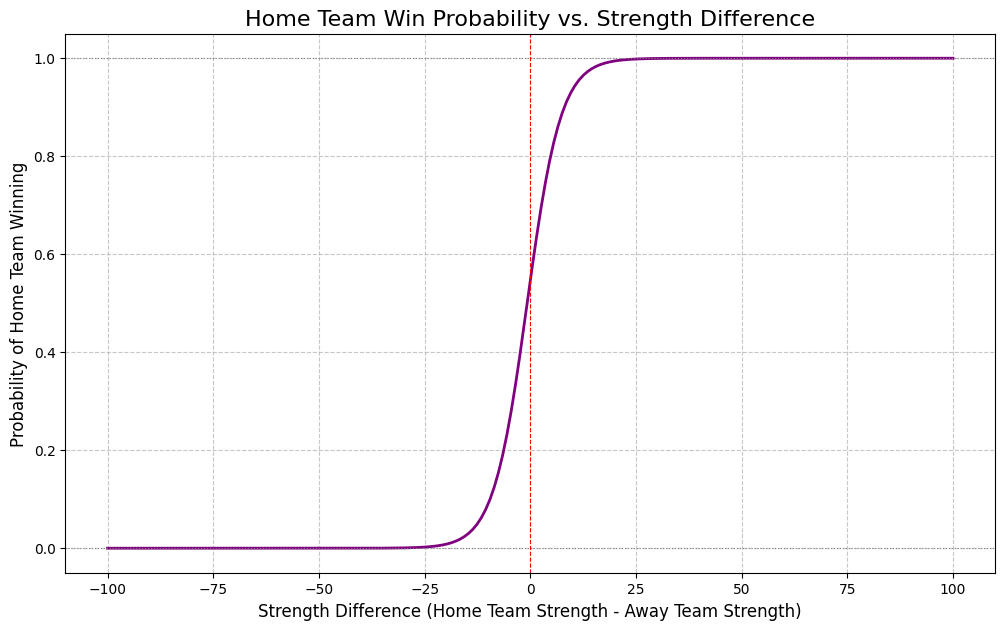

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Define the logistic function
def logistic_function(log_odds):
    """
    Calculates the probability using the logistic (sigmoid) function for given log-odds.
    The formula is P = 1 / (1 + e^(-log_odds))
    """
    return 1 / (1 + np.exp(-log_odds))

model_intercept = model.intercept_
model_coefficient = model.coef_[0][0]

strength_difference_values = np.linspace(-100, 100, 200) # Generates 200 points

#Calculate the corresponding log-odds using your model's formula
log_odds_values = model_intercept + (model_coefficient * strength_difference_values)

#Calculate the probabilities (y-axis) using the logistic function
predicted_probabilities = logistic_function(log_odds_values)

#Plot the probability curve
plt.figure(figsize=(12, 7)) # Set the figure size for better readability
plt.plot(strength_difference_values, predicted_probabilities, color='purple', linewidth=2, label='Predicted Home Win Probability')

# Add labels and title
plt.title('Home Team Win Probability vs. Strength Difference', fontsize=16)
plt.xlabel('Strength Difference (Home Team Strength - Away Team Strength)', fontsize=12)
plt.ylabel('Probability of Home Team Winning', fontsize=12)

# Add a grid for easier reading
plt.grid(True, linestyle='--', alpha=0.7)

# Add horizontal lines at 0 and 1 to show the probability bounds
plt.axhline(0, color='gray', linestyle=':', linewidth=0.8)
plt.axhline(1, color='gray', linestyle=':', linewidth=0.8)

# Add a vertical line at Strength Difference = 0 (where teams are equally strong)
# This point corresponds to the intercept's probability
plt.axvline(0, color='red', linestyle='--', linewidth=0.8, label='Strength Difference = 0')

# Add a point for the intercept's probability
intercept_probability = logistic_function(model_intercept)
plt.plot(0, intercept_probability, 'o', color='green', markersize=8, label=f'Intercept Probability ({intercept_probability:.2f})')

# Add text annotation for the intercept probability
plt.text(0, intercept_probability + 0.03, f'{intercept_probability:.2f}',
         horizontalalignment='center', verticalalignment='bottom', fontsize=10, color='green')


# Set y-axis limits to clearly show 0 to 1 range
plt.ylim(-0.05, 1.05)

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [36]:
def predict_match(home_team, away_team):

    #Calculating win probability for IND vs PAK
    home_elo_current = elo_ratings.get(f'{home_team}', starting_ELO)  # Get latest ELO, or initial if not found
    away_elo_current = elo_ratings.get(f'{away_team}', starting_ELO)

    print(f"{home_team} (ELO: {home_elo_current:.0f}) vs {away_team} (ELO: {away_elo_current:.0f})")

    #Getting their recent form
    home_team_home_games = test_data[test_data['HomeTeam'] == f'{home_team}'].sort_values(by='Match ID', ascending=False)
    home_recent_form = home_team_home_games['HomeTeamForm'].iloc[0]

    away_team_home_games = test_data[test_data['AwayTeam'] == f'{away_team}'].sort_values(by='Match ID', ascending=False)
    away_recent_form = away_team_home_games['AwayTeamForm'].iloc[0]

    print(f"{home_team} Recent Form: Won{home_recent_form * 5: .0f} of last 5 home games")
    print(f"{away_team} Recent Form: Won{away_recent_form * 5: .0f} of last 5 away games")

    #Calculate features for this new match
    new_elo_difference = home_elo_current - away_elo_current
    new_home_advantage = 1
    new_recent_form_home = home_recent_form
    new_recent_form_away = away_recent_form

    #New Interaction Features
    new_elo_diff_x_home_form = new_elo_difference * new_recent_form_home
    new_elo_diff_x_away_form = new_elo_difference * new_recent_form_away
    new_home_form_x_away_form = new_recent_form_home * new_recent_form_away

    #Create a DataFrame for prediction
    numeric_features = pd.DataFrame(
        [[new_recent_form_home, new_recent_form_away, new_home_advantage, new_elo_difference, new_elo_diff_x_home_form, new_elo_diff_x_away_form, new_home_form_x_away_form]],
        columns=['HomeTeamForm', 'AwayTeamForm', 'home_advantage', 'elo_difference', 'elo_diff_x_home_form', 'elo_diff_x_away_form', 'home_form_x_away_form'])

    numeric_features[['HomeTeamForm', 'AwayTeamForm', 'elo_difference', 'elo_diff_x_home_form', 'elo_diff_x_away_form', 'home_form_x_away_form']] = scaler.transform(numeric_features[['HomeTeamForm', 'AwayTeamForm', 'elo_difference', 'elo_diff_x_home_form', 'elo_diff_x_away_form', 'home_form_x_away_form']])

    #Add OHE features
    #Set all teams to 0
    new_home_team_ohe = pd.DataFrame(0, index=[0], columns=[f'HomeTeam_{team}' for team in all_teams_sorted])
    new_away_team_ohe = pd.DataFrame(0, index=[0], columns=[f'AwayTeam_{team}' for team in all_teams_sorted])

    if f'HomeTeam_{home_team}' in new_home_team_ohe.columns:
        new_home_team_ohe[f'HomeTeam_{home_team}'] = 1
    if f'AwayTeam_{away_team}' in new_away_team_ohe.columns:
        new_away_team_ohe[f'AwayTeam_{away_team}'] = 1

    # Combine all features for prediction
    new_match_features = pd.concat([numeric_features, new_home_team_ohe, new_away_team_ohe], axis=1)


    #Predict
    prob_home_win = model.predict_proba(new_match_features)[:, 1][0]
    outcome = f"{home_team} Wins" if prob_home_win > 0.5 else f"{away_team} Wins"

    print(f"\nPredicted probability of {home_team} winning: {prob_home_win * 100:.2f}%")
    print(f"Predicted probability of {away_team} winning: {100 - prob_home_win * 100:.2f}%")
    print(f"Predicted outcome: {outcome}")

In [37]:
predict_match('Pakistan', 'India')

Pakistan (ELO: 2697) vs India (ELO: 4013)
Pakistan Recent Form: Won 3 of last 5 home games
India Recent Form: Won 1 of last 5 away games

Predicted probability of Pakistan winning: 50.04%
Predicted probability of India winning: 49.96%
Predicted outcome: Pakistan Wins
